In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [118]:
import os
cwd = os.getcwd()

In [119]:
df = pd.read_csv(f'{cwd}/marketing_campaign_data.csv')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [121]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
398,398,798,1987,S1,Lajang,23442000.0,1,0,24-12-2012,71,2000,0,6000,8000,6000,5000,1,1,0,3,7,0,0,0,0,0,0,3,11,0
658,658,3867,1947,S3,Bertunangan,73059000.0,0,1,31-08-2013,36,410000,112000,420000,0,82000,71000,1,9,3,13,4,0,0,0,0,0,0,3,11,0
85,85,5268,1960,S1,Menikah,29440000.0,1,1,11-08-2013,95,17000,8000,14000,10000,4000,3000,2,1,0,4,7,0,0,0,0,0,0,3,11,0
1095,1095,9964,1979,S1,Lajang,61825000.0,0,1,07-08-2013,56,162000,50000,100000,55000,30000,27000,1,4,2,8,4,0,0,0,0,0,0,3,11,0
710,710,1940,1986,S1,Menikah,25252000.0,1,0,12-07-2013,26,1000,3000,4000,2000,2000,6000,1,1,0,2,8,0,0,0,0,0,0,3,11,0


In [159]:
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'Age', 'join_at_age', 'total_kids', 'total_amount_spent'
                     ]

categorical_features = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_group'
                       ]

# TUGAS 1 #

## feature engineering: conversion rate ##

In [123]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['total_kids'] > 0, 1, 0)

C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_12132\1954984958.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_12132\1954984958.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_12132\1954984958.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_12132\1954984958.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt

In [124]:
# amount spent
df['total_amount_spent'] = df['MntCoke'] \
                              + df['MntFruits'] \
                              + df['MntMeatProducts'] \
                              + df['MntFishProducts'] \
                              + df['MntSweetProducts'] \
                              + df['MntGoldProds']

# accepted campaigns
df['total_accepted_campaign'] = df['AcceptedCmp1'] \
                                    + df['AcceptedCmp2'] \
                                    + df['AcceptedCmp3'] \
                                    + df['AcceptedCmp4'] \
                                    + df['AcceptedCmp5']

# total transaction purchased 
df['total_transaction'] = df['NumDealsPurchases'] \
                            + df['NumWebPurchases'] \
                            + df['NumCatalogPurchases'] \
                            + df['NumStorePurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

df['conversion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)

In [125]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000


## Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok ##

In [126]:
df.Year_Birth = pd.to_datetime(df['Year_Birth'], format='%Y')
year_now = datetime.date.today().year
df['Age'] = df['Year_Birth'].apply(lambda x: year_now - x.year)
#df.drop('Year_Birth',axis=1, inplace=True)

In [127]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age
0,0,5524,1957-01-01,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429,66
1,1,2174,1954-01-01,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000,69
2,2,4141,1965-01-01,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000,58
3,3,6182,1984-01-01,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333,39
4,4,5324,1981-01-01,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000,42


In [128]:
df.groupby(['Age']).agg({'Age': 'count'})

,Age
Age,
27,2
28,5
29,3
30,5
31,13
32,15
33,18
34,30
35,29


In [129]:
# Adults (18 years or older)
# Older adults (65 and older)*
df.loc[(df['Age'] >= 18) & (df['Age'] < 35), 'age_group'] = 'Young Adults'
df.loc[(df['Age'] >= 35) & (df['Age'] < 55), 'age_group'] = 'Middle Adults'
df.loc[(df['Age'] >= 55), 'age_group'] = 'Older adult'

In [130]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,age_group
0,0,5524,1957-01-01,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429,66,Older adult
1,1,2174,1954-01-01,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000,69,Older adult
2,2,4141,1965-01-01,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000,58,Older adult
3,3,6182,1984-01-01,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333,39,Middle Adults
4,4,5324,1981-01-01,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000,42,Middle Adults


In [131]:
df['age_group'].value_counts()

Middle Adults    1144
Older adult      1005
Young Adults       91
Name: age_group, dtype: int64

In [132]:
import matplotlib.pyplot as plt

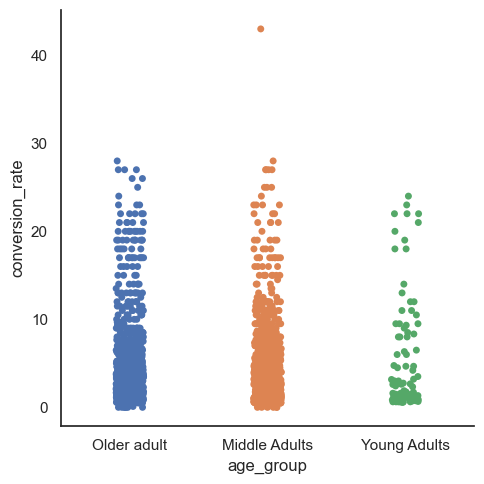

In [133]:
sns.catplot(data=df, x='age_group', y='conversion_rate')
plt.show()

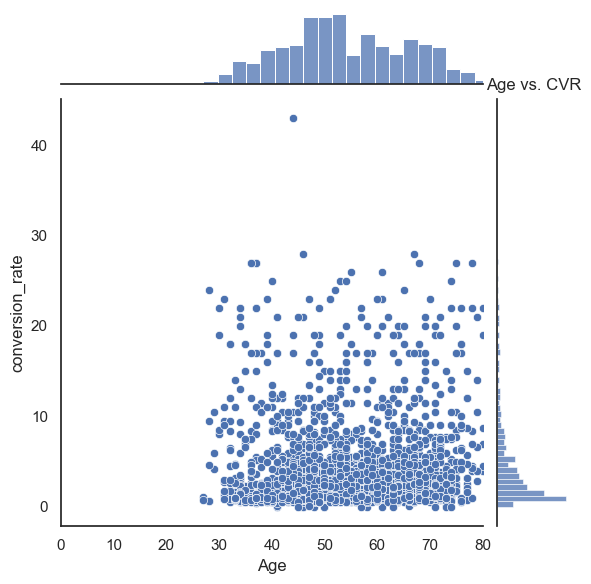

In [134]:
plot = sns.jointplot(x=df["Age"], y=df["conversion_rate"])
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

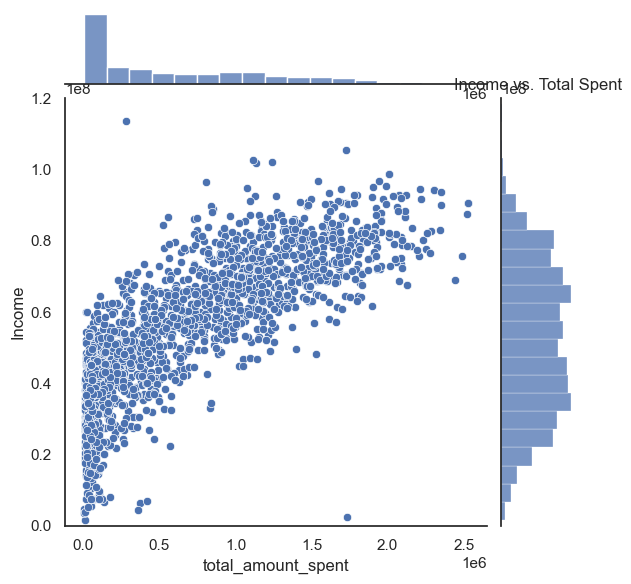

In [135]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"])
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

# TUGAS 2 #

## Mengatasi data null dan duplicated ##

In [136]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,age_group
0,0,5524,1957-01-01,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429,66,Older adult
1,1,2174,1954-01-01,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000,69,Older adult
2,2,4141,1965-01-01,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000,58,Older adult
3,3,6182,1984-01-01,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333,39,Middle Adults
4,4,5324,1981-01-01,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000,42,Middle Adults


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   datetime64[ns]
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

In [138]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
join_at_age                 0
total_kids                  0
is_parents                  0
total_amou

In [139]:
df.duplicated(subset=['ID']).sum()

0

In [140]:
df.describe()

,Unnamed: 0,ID,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222,54.194196
std,646.776623,3246.662198,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624,11.984069
min,0.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,27.000000
25%,559.750000,2828.250000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222,46.000000
50%,1119.500000,5458.500000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000,53.000000
75%,1679.250000,8427.750000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000,64.000000
max,2239.000000,11191.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000,130.000000


In [141]:
df = df.dropna()

In [142]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
join_at_age                0
total_kids                 0
is_parents                 0
total_amount_spent         0
total_accepted

## Membuang data yang tidak diperlukan ##

In [143]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'join_at_age', 'total_kids', 'is_parents', 'total_amount_spent',
       'total_accepted_campaign', 'total_transaction', 'conversion_rate',
       'Age', 'age_group'],
      dtype='object')

In [144]:
df_drop1 = ['Unnamed: 0']
df = df.drop(df_drop1, axis=1)

In [145]:
#df_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue']
#df = df.drop(df_drop, axis=1)

## Feature Encoding ##

In [146]:
#df1 = df

In [147]:
cat = df.select_dtypes(include='object').columns

In [148]:
cat

Index(['Education', 'Marital_Status', 'age_group'], dtype='object')

In [149]:
df['is_parents'].unique()

array([0, 1])

In [150]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())
print("Unique values in age_group column:", df['age_group'].unique())

Unique values in Education column: ['S1' 'S3' 'S2' 'SMA' 'D3']
Unique values in Marital_Status column: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
Unique values in age_group column: ['Older adult' 'Middle Adults' 'Young Adults']


In [151]:
def living_status(marital_status):
    if marital_status in ['Lajang', 'Bertunangan', 'Cerai', 'Janda', 'Duda']:
        return 'Lajang'
    else:
        return 'Menikah'

df['Marital_Status'] = df['Marital_Status'].apply(living_status)

In [152]:
mapping_Education = {
    'S1' : 3,
    'S3' : 5,
    'S2' : 4,
    'SMA': 1,
    'D3' : 2
}

mapping_Marital_Status = {
    'Lajang'  : 0,
    'Menikah' : 1

}


mapping_age_group = {
    'Older adult' : 2, 
    'Middle Adults': 1,
    'Young Adults' : 0,
}


df['Education'] = df['Education'].map(mapping_Education)
df['Marital_Status'] = df['Marital_Status'].map(mapping_Marital_Status)
df['age_group'] = df['age_group'].map(mapping_age_group)

In [153]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,age_group
0,5524,1957-01-01,3,0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429,66,2
1,2174,1954-01-01,3,0,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000,69,2
2,4141,1965-01-01,3,0,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000,58,2
3,6182,1984-01-01,3,0,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333,39,1
4,5324,1981-01-01,5,1,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000,42,1


## Melakukan standarisasi pada feature ##

In [156]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_features:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 38)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,age_group
0,5524,1957-01-01,3,0,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,0.897752,-1.264803,0,1.675488,0,25,3.571429,0.986443,2
1,2174,1954-01-01,3,0,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,0,1.313688,1.405806,1,-0.962358,0,6,1.200000,1.236801,2
2,4141,1965-01-01,3,0,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0,0.315443,-1.264803,0,0.280250,0,21,5.250000,0.318822,2


In [157]:
df[numerical_features].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,join_at_age,total_kids,total_amount_spent
count,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2.216000e+03
mean,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,3.0,11.0,54.179603,44.208032,0.947202,6.070754e+05
std,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.0,0.0,11.985554,12.023812,0.749062,6.029005e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,27.000000,16.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,46.000000,36.000000,0.000000,6.900000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,53.000000,43.000000,1.000000,3.965000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,64.000000,54.000000,1.000000,1.048000e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,130.000000,121.000000,3.000000,2.525000e+06


In [160]:
df[categorical_features].describe()

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents,age_group
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,3.459838,0.386733,0.064079,0.013538,0.073556,0.074007,0.073105,0.009477,0.150271,0.714350,1.407942
std,1.004825,0.487112,0.244950,0.115588,0.261106,0.261842,0.260367,0.096907,0.357417,0.451825,0.568242
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# TUGAS 3 #

## Melihat jumlah cluster yang tepat dengan menggunakan elbow method ##

[102156.6390608018, 75786.37182338818, 59451.095603017675, 53153.34086050468, 48128.12915944515, 44715.59752524897, 41704.007578516954, 39240.6109401235, 37910.336415795, 36682.08631829302, 35568.98531015089, 34589.67051151925, 33965.99286339751, 32977.72676822681, 32459.260130990304, 31591.903468999742, 30993.936374529898, 30512.534499044326]


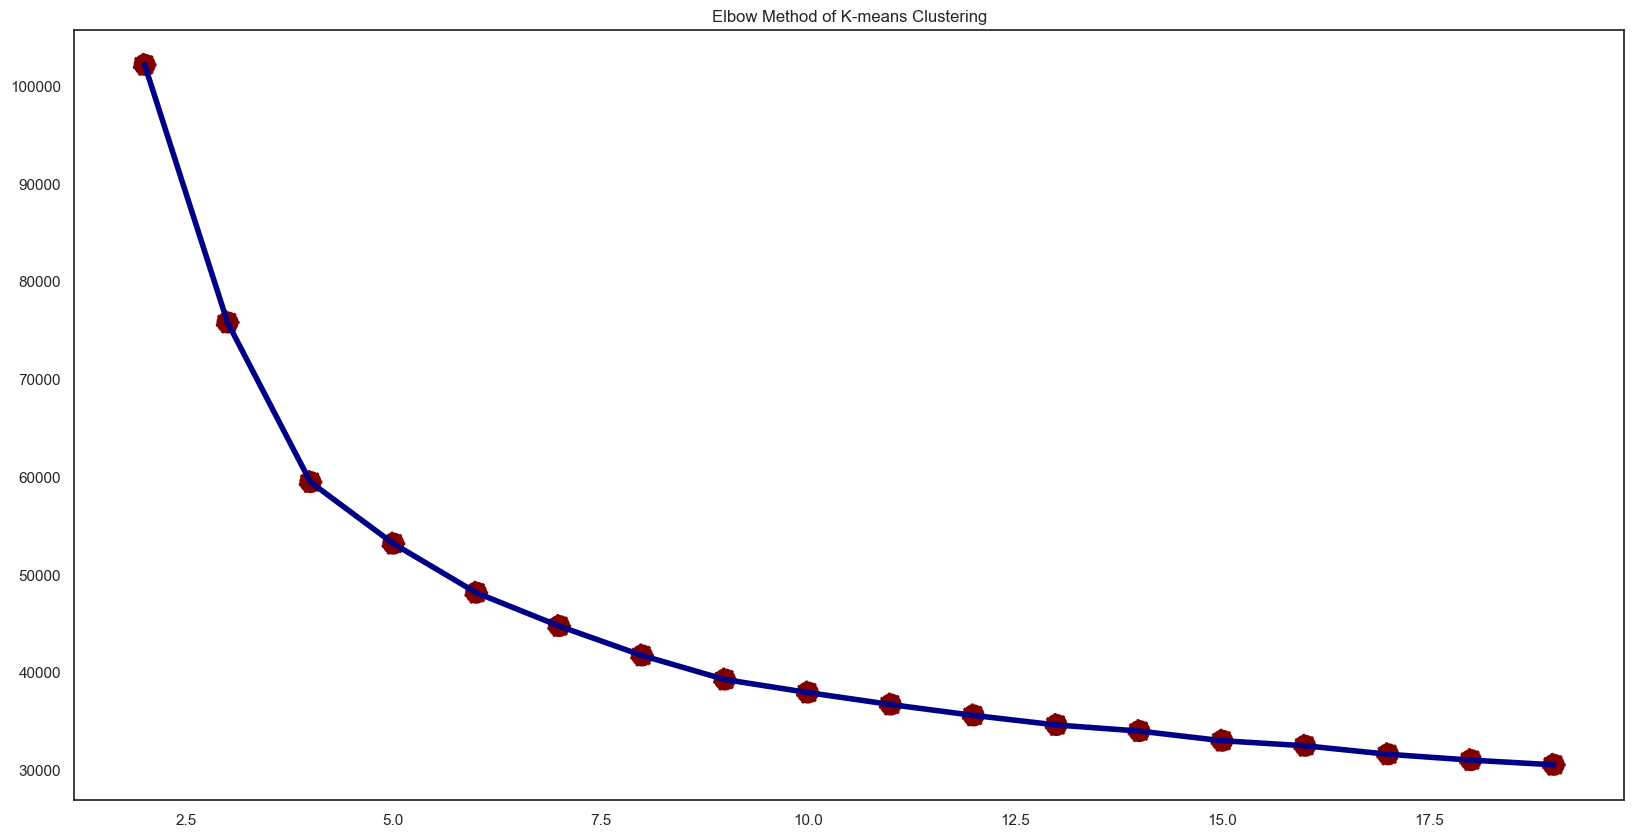

In [164]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_group', 'Dt_Customer']).copy()
# X = dataset_scaled[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [166]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [167]:
X.tail()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,cluster
2235,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0,0,0,0,0,0,0.0,0.0,0,0.149069,0.070501,1,1.217598,0,18,3.600000,0.151917,2
2236,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,0,0,0,1,0,0,0.0,0.0,0,1.979184,2.741110,1,-0.270546,1,22,3.142857,1.904422,1
2237,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,0,1,0,0,0,0,0.0,0.0,0,-0.932363,-1.264803,0,1.051696,1,19,3.166667,-1.016420,2
2238,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,0,0,0,0,0,0,0.0,0.0,0,1.147313,0.070501,1,0.391404,0,23,7.666667,1.069896,1
2239,0.024705,1.039938,0.909066,-0.311405,-0.655568,-0.587058,-0.472705,-0.651038,-0.633880,-0.443313,0.351713,-0.396043,-0.571082,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,1.147313,1.405806,1,-0.721800,0,11,1.571429,1.236801,0


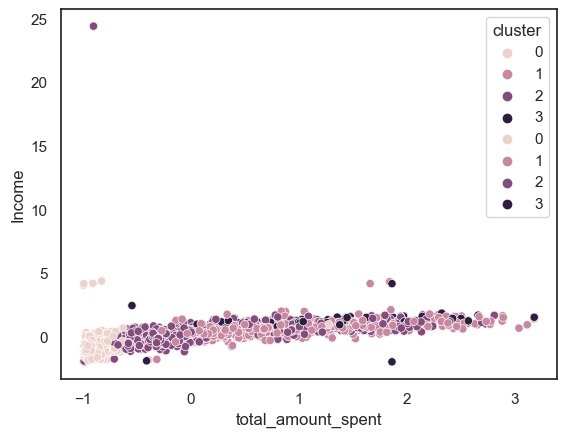

In [169]:
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster')
plt.show()

In [170]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

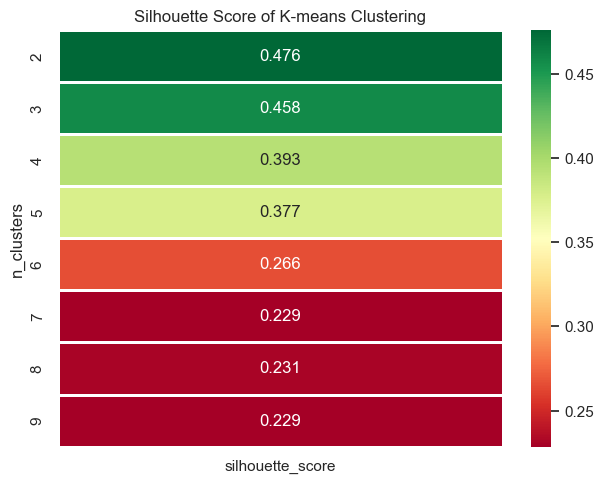

In [171]:
visualize_silhouette_layer(X)

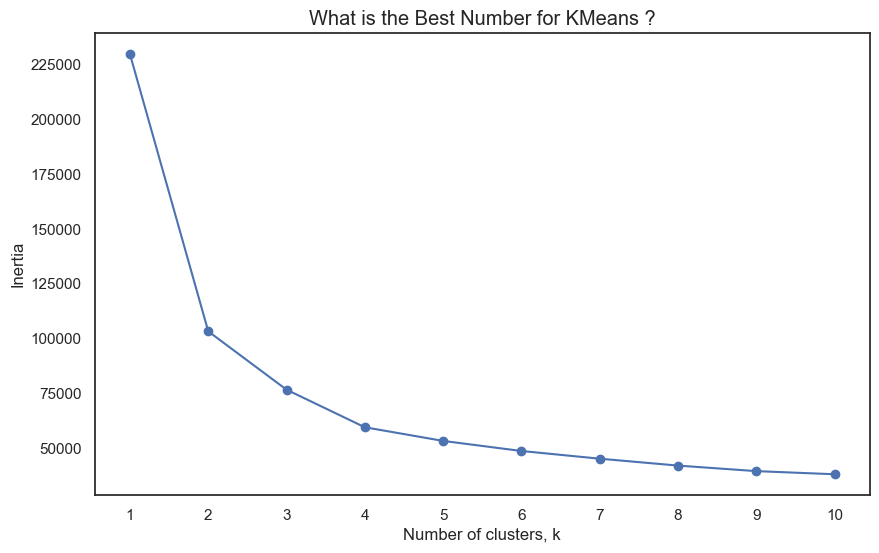

In [201]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
silhouette = []
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(X)
    cluster = kc.fit_predict(X)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

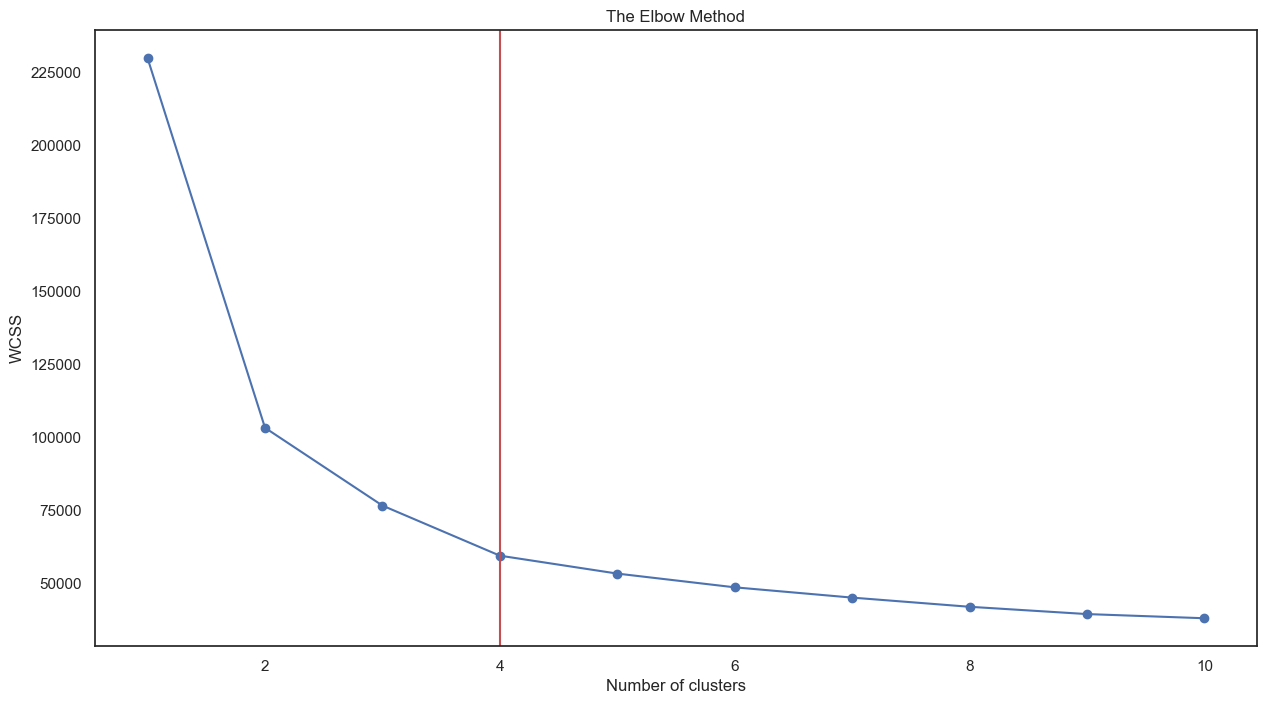

In [208]:
# membuat fungsi Elbow Method
sns.set_theme('notebook', style='white')
def elbowMethod(X, k_min=1, k_max= 10):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(X)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
elbowMethod(X)

In [210]:
kmeans1 = KMeans(n_clusters = 4, random_state = 42).fit(X)
labels1 = kmeans1.labels_

In [215]:
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

print('n-cluster = 4')
print()
hasilcl = df.copy()
hasilcl['kmeans_4cluster'] = labels1
print('Cluster and its customers quantity :')
display(hasilcl.kmeans_4cluster.value_counts(ascending=True))
display(hasilcl[['ID', 'kmeans_4cluster']])

n-cluster = 4

Cluster and its customers quantity :


2    137
1    564
0    602
3    913
Name: kmeans_4cluster, dtype: int64

,ID,kmeans_4cluster
0,5524,1
1,2174,3
2,4141,1
3,6182,3
4,5324,0
...,...,...
2235,10870,0
2236,4001,1
2237,7270,0
2238,8235,1


In [212]:
X.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'join_at_age', 'total_kids', 'is_parents', 'total_amount_spent',
       'total_accepted_campaign', 'total_transaction', 'conversion_rate',
       'Age', 'cluster'],
      dtype='object')

In [213]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age,cluster
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,0.897752,-1.264803,0,1.675488,0,25,3.571429,0.986443,1
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,0,1.313688,1.405806,1,-0.962358,0,6,1.200000,1.236801,0
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0,0.315443,-1.264803,0,0.280250,0,21,5.250000,0.318822,1
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0.0,0.0,0,-1.181925,0.070501,1,-0.919224,0,8,1.333333,-1.266777,0
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0.0,0.0,0,-0.932363,0.070501,1,-0.307044,0,19,3.800000,-1.016420,2


In [219]:
#average of clusters
hasilcl2 = hasilcl[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'join_at_age', 'total_kids', 'is_parents', 'total_amount_spent',
       'total_accepted_campaign', 'total_transaction', 'conversion_rate',
       'Age', 'cluster']].copy()

analysis_res = hasilcl2.groupby('cluster').agg({'mean'})
#analysis_res['Banyak_cust'] = hasilcl2.groupby('cluster')['ID'].count()
display(analysis_res)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.372368e+07,0.790800,0.440307,48.824754,29661.555312,4328.587076,17722.891566,6046.002191,4403.066813,13751.369113,1.812705,1.851041,0.438116,2.996714,6.437021,0.071194,0.007667,0.000000,0.000000,0.003286,0.013143,3.0,11.0,0.088719,41.607886,1.231106,0.878423,7.591347e+04,0.082147,7.098576,1.226841,51.456736
1,6.846531e+07,0.157801,0.588652,49.865248,622104.609929,49601.063830,321539.007092,69459.219858,50767.730496,72040.780142,2.978723,6.851064,5.338652,9.374113,4.599291,0.086879,0.134752,0.143617,0.148936,0.026596,0.008865,3.0,11.0,0.205674,46.147163,0.746454,0.615248,1.185512e+06,0.540780,24.542553,6.358675,56.303191
2,5.914154e+07,0.277409,0.627907,48.586379,379551.495017,28579.734219,182749.169435,41312.292359,28446.843854,54850.498339,2.780731,4.988372,2.700997,6.127907,5.280731,0.061462,0.116279,0.074751,0.063123,0.016611,0.004983,3.0,11.0,0.181063,45.760797,0.905316,0.705980,7.154900e+05,0.332226,16.598007,3.924443,55.837209
3,7.863174e+07,0.007299,0.058394,48.627737,508357.664234,67686.131387,456343.065693,101021.897810,73854.014599,81905.109489,1.021898,3.620438,6.437956,8.343066,1.000000,0.087591,0.080292,0.262774,0.145985,0.014599,0.007299,3.0,11.0,0.197080,46.729927,0.065693,0.065693,1.289168e+06,0.591241,19.423358,19.423358,56.299270


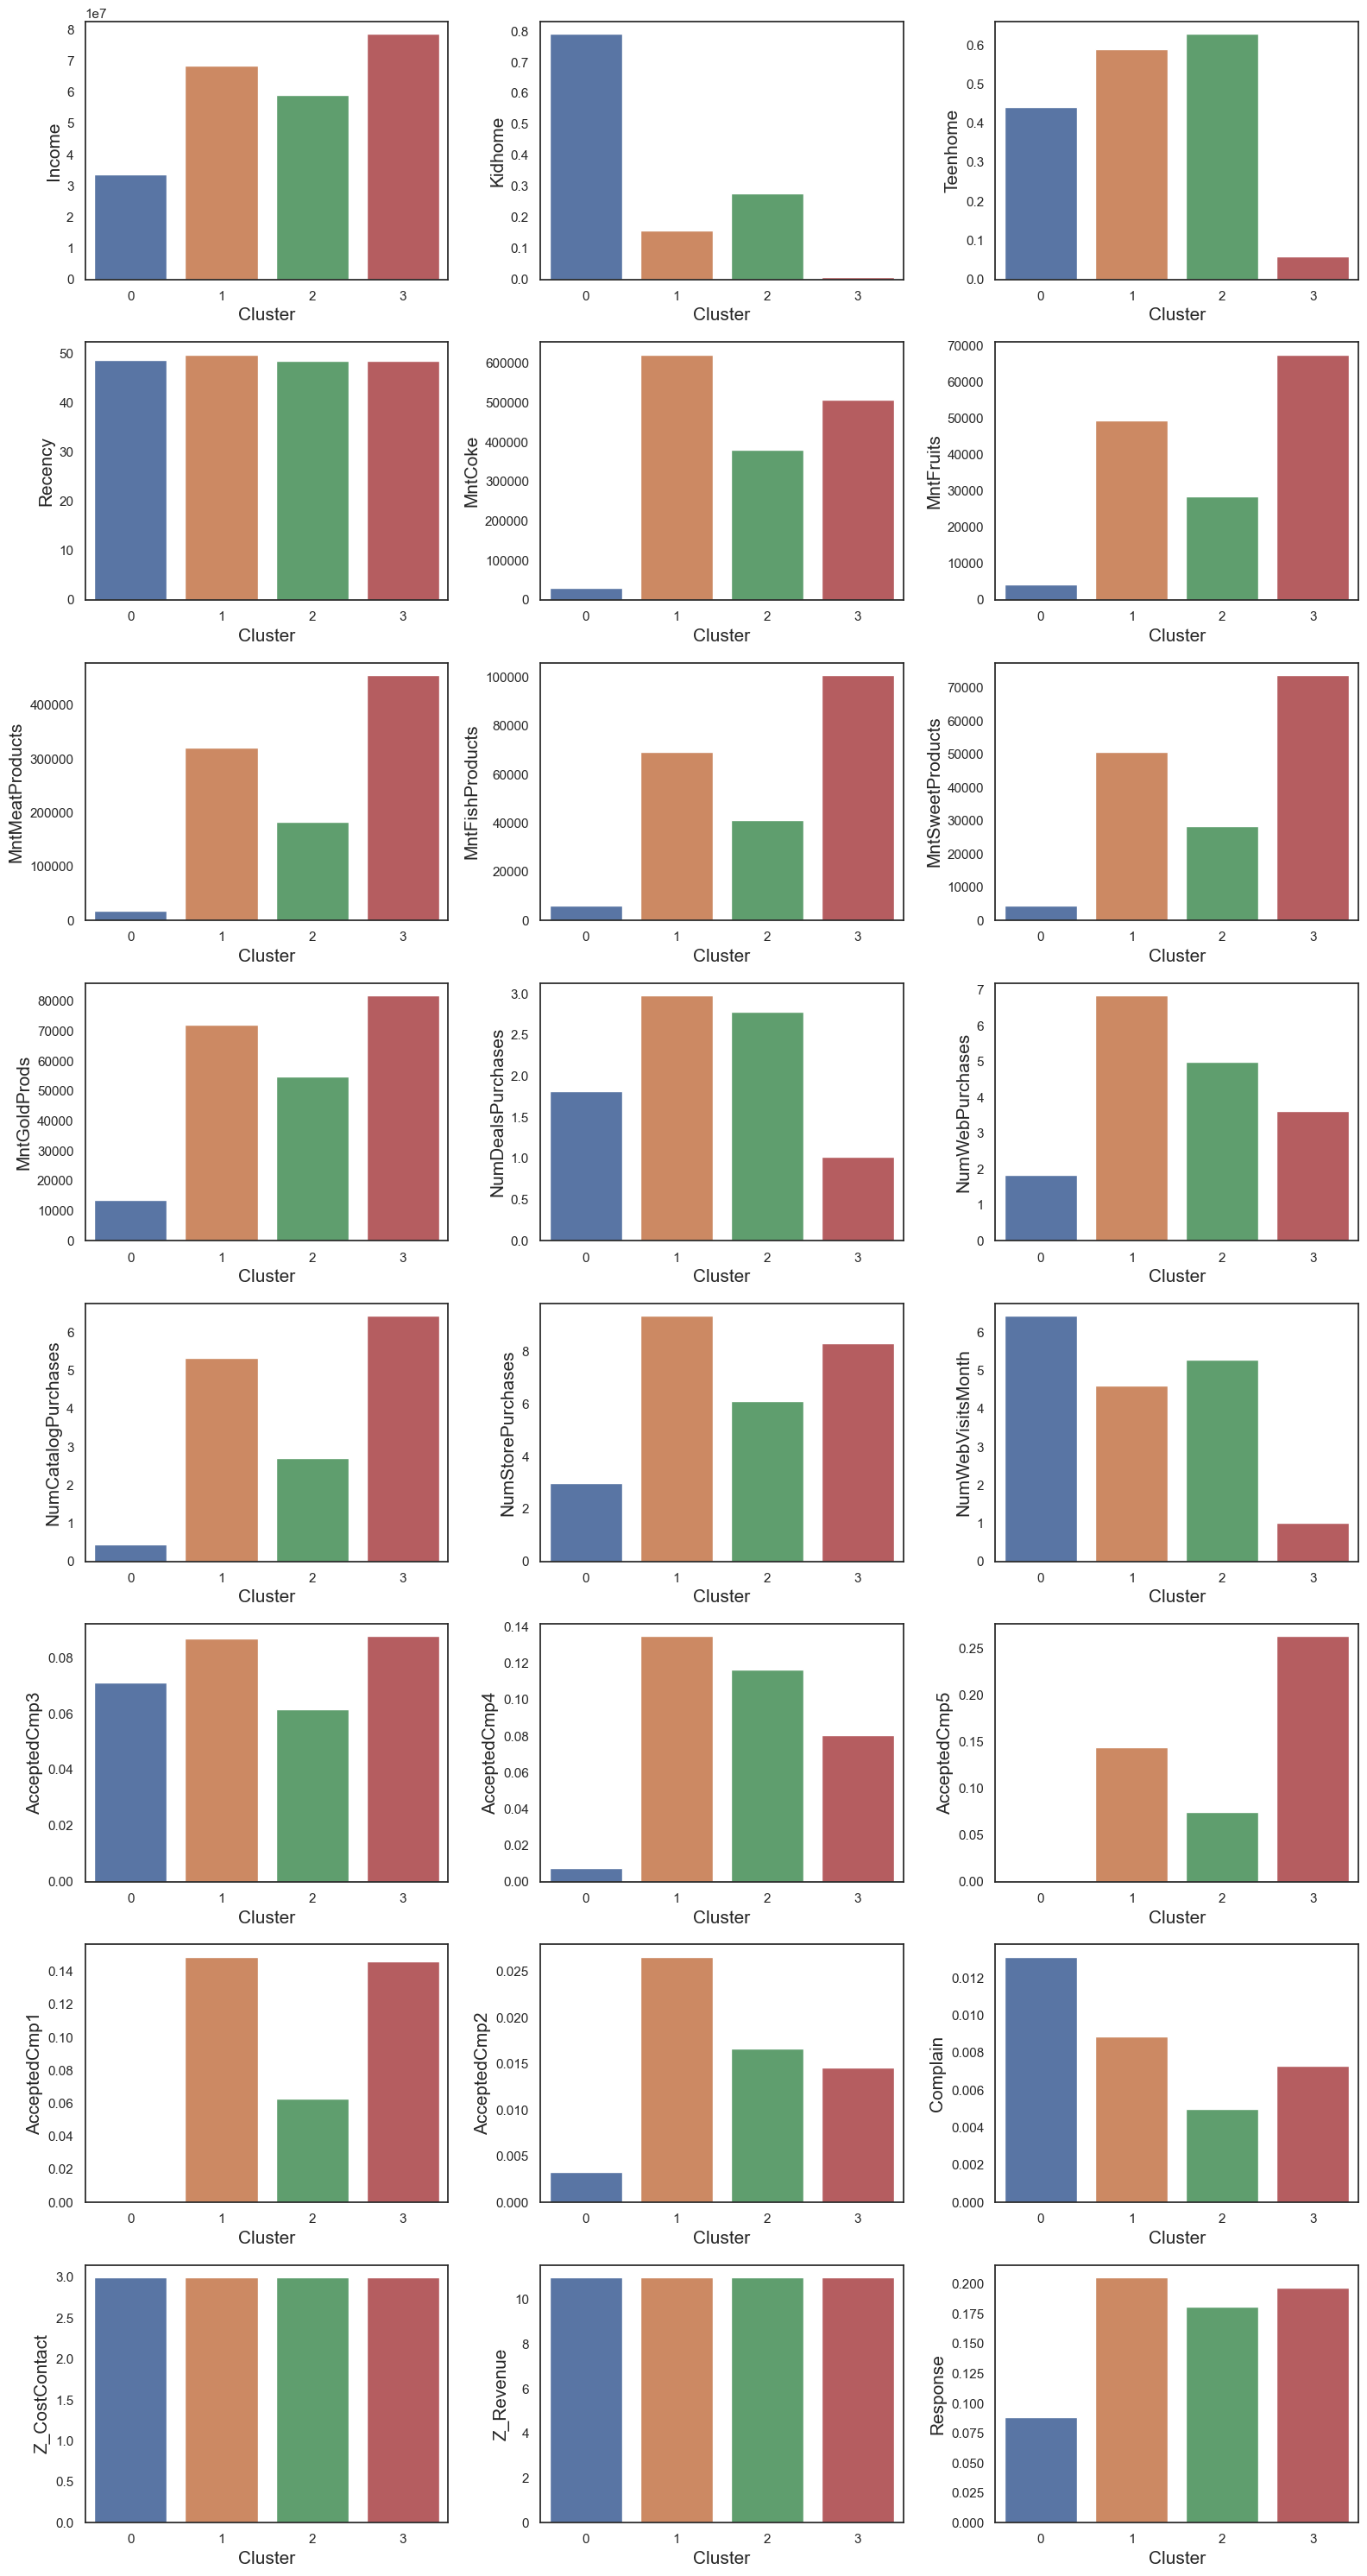

In [228]:
# Visualisasi 
plt.figure(figsize=(16, 30))
for i, var in enumerate(X.columns):
    try:
        plt.subplot(8,3,i+1)
    except ValueError:
        break
    sns.barplot(x = analysis_res.reset_index().cluster, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()

# TUGAS 4 #

## Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan

In [223]:
display(analysis_res)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Age
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.372368e+07,0.790800,0.440307,48.824754,29661.555312,4328.587076,17722.891566,6046.002191,4403.066813,13751.369113,1.812705,1.851041,0.438116,2.996714,6.437021,0.071194,0.007667,0.000000,0.000000,0.003286,0.013143,3.0,11.0,0.088719,41.607886,1.231106,0.878423,7.591347e+04,0.082147,7.098576,1.226841,51.456736
1,6.846531e+07,0.157801,0.588652,49.865248,622104.609929,49601.063830,321539.007092,69459.219858,50767.730496,72040.780142,2.978723,6.851064,5.338652,9.374113,4.599291,0.086879,0.134752,0.143617,0.148936,0.026596,0.008865,3.0,11.0,0.205674,46.147163,0.746454,0.615248,1.185512e+06,0.540780,24.542553,6.358675,56.303191
2,5.914154e+07,0.277409,0.627907,48.586379,379551.495017,28579.734219,182749.169435,41312.292359,28446.843854,54850.498339,2.780731,4.988372,2.700997,6.127907,5.280731,0.061462,0.116279,0.074751,0.063123,0.016611,0.004983,3.0,11.0,0.181063,45.760797,0.905316,0.705980,7.154900e+05,0.332226,16.598007,3.924443,55.837209
3,7.863174e+07,0.007299,0.058394,48.627737,508357.664234,67686.131387,456343.065693,101021.897810,73854.014599,81905.109489,1.021898,3.620438,6.437956,8.343066,1.000000,0.087591,0.080292,0.262774,0.145985,0.014599,0.007299,3.0,11.0,0.197080,46.729927,0.065693,0.065693,1.289168e+06,0.591241,19.423358,19.423358,56.299270


In [226]:
data = {'cluster' : [0, 1, 2, 3],
        'avg_income' : [33723680, 68465310, 59141540, 78631740],
        'kid' : [0.8, 0.2, 0.3, 0.007], 
        'teen' : [0.4, 0.6, 0.6, 0.05],
        'child_conclusion' : ['having kid', 'having teen', 'having teen', 'dont have'],
        'last_buy' :[48.8, 49.9, 48.6, 48.6], 
        'coke_buy' : ['very low', 'high', 'low', 'moderate'], 
        'fruit_buy' : ['very low', 'moderate', 'low', 'high'], 
        'meat_buy' : ['very low', 'moderate', 'low', 'high'],
        'fish_buy' : ['very low', 'moderate', 'low', 'high'], 
        'sweet_buy' : ['very low', 'moderate', 'low', 'high'], 
        'gold_buy' : ['very low', 'moderate', 'moderate', 'high'],
        'dealspurchases' : ['low', 'high', 'moderate', 'very low'],
        'web_purc' : ['very low', 'high', 'moderate', 'low'],
        'catalog_purc' : ['very low', 'moderate', 'low', 'high'], 
        'store_purc' : ['very low', 'high', 'moderate', 'moderate'],
        'web_visit' : ['high', 'moderate', 'moderate', 'very low'], 
        'avg_complains' : ['high', 'moderate', 'low', 'moderate'], 
        'total_amount_spent' : [75913, 1185512, 715490, 1289168],
        'conversion_rate' : [1.2, 6.4, 4.0, 19.4],
        'avg_age' : [51.5, 56.3, 55.8, 56.2],
        'response_acpt_campaign' : ['low', 'high', 'moderate', 'high'] 
        }

hasil = pd.DataFrame(data)
hasil

,cluster,avg_income,kid,teen,child_conclusion,last_buy,coke_buy,fruit_buy,meat_buy,fish_buy,sweet_buy,gold_buy,dealspurchases,web_purc,catalog_purc,store_purc,web_visit,avg_complains,total_amount_spent,conversion_rate,avg_age,response_acpt_campaign
0,0,33723680,0.800,0.40,having kid,48.8,very low,very low,very low,very low,very low,very low,low,very low,very low,very low,high,high,75913,1.2,51.5,low
1,1,68465310,0.200,0.60,having teen,49.9,high,moderate,moderate,moderate,moderate,moderate,high,high,moderate,high,moderate,moderate,1185512,6.4,56.3,high
2,2,59141540,0.300,0.60,having teen,48.6,low,low,low,low,low,moderate,moderate,moderate,low,moderate,moderate,low,715490,4.0,55.8,moderate
3,3,78631740,0.007,0.05,dont have,48.6,moderate,high,high,high,high,high,very low,low,high,moderate,very low,moderate,1289168,19.4,56.2,high
